In [83]:
import h5py
import numpy as np
import os
import torch
from pointnet2_ops import pointnet2_utils
with h5py.File('/data2/gaoziqi/Point-MAE-main/model2017-1_face12_nomouth.h5',"r") as f:
    shape_mean=f['shape']['model']['mean']
    shape_mean=np.array(shape_mean)
    shape_noiseVariance=f['shape']['model']['noiseVariance']
    shape_noiseVariance=np.array(shape_noiseVariance)
    shape_pcaBasis=f['shape']['model']['pcaBasis']
    shape_pcaBasis=np.array(shape_pcaBasis)
    shape_pcaVariance=f['shape']['model']['pcaVariance']
    shape_pcaVariance=np.array(shape_pcaVariance)
    exp_mean=f['expression']['model']['mean']
    exp_mean=np.array(exp_mean)
    exp_noiseVariance=f['expression']['model']['noiseVariance']
    exp_noiseVariance=np.array(exp_noiseVariance)
    exp_pcaBasis=f['expression']['model']['pcaBasis']
    exp_pcaBasis=np.array(exp_pcaBasis)
    exp_pcaVariance=f['expression']['model']['pcaVariance']
    exp_pcaVariance=np.array(exp_pcaVariance)
shapes=10000
expressions=25
save_folder='/data2/gaoziqi/Point-MAE-main/data/syn_Data/'
if os.path.exists(save_folder)!=1:
    os.mkdir(save_folder)
ClassNameFromat=400000000
mean_alfa=np.zeros((199,1))
mean_beta=np.zeros((100,1))
Alfa=np.concatenate((mean_alfa,np.random.randn(199,shapes)),axis=1)
Beta=np.concatenate((mean_beta,np.random.randn(100,shapes)),axis=1)
#print(Beta)
k=0
files_num=1
fake_pointclouds = torch.Tensor([])
for i in range(1,shapes+1):
    alfa = Alfa[:,i]
    
    ShapeFolder = save_folder
    ScanNameFormat=000
    for j in range(1,expressions+1):
        print('class [%d]/[%d]: expression[%d]/[%d]\n'%(i,shapes,j,expressions))
        beta = Beta[:,j]
        #print(exp_pcaBasis.shape)
        exp_beta = np.dot(exp_pcaBasis, (beta * np.sqrt(exp_pcaVariance)))
        shape_alfa = np.dot(shape_pcaBasis ,(alfa * np.sqrt(shape_pcaVariance)))
        #print(exp_beta.shape)
        face = shape_mean + shape_alfa + exp_mean + exp_beta
        #np.savetxt(save_folder+"1.txt",face)       
        face=face.reshape(3,len(face)//3,order="F").T
        
        dsface=face[8157,:]
        face = face - face[8157,:]
        choice = np.random.choice(len(face), len(face), replace=False)       
        sample = face[choice, :]#choice
        
        sample[:,0:3] = (sample[:,0:3])/(100)
        ScanName=os.path.join(ShapeFolder,str(k))
        # fps_idx = pointnet2_utils.furthest_point_sample(torch.tensor(sample).float().cuda(), 10000)  # (B, npoint)
        # sample = pointnet2_utils.gather_operation(torch.tensor(sample).float().cuda().unsqueeze(0).transpose(1, 2).contiguous(), fps_idx).transpose(1, 2).contiguous()  
        #print(ScanName)
        #np.savetxt(ScanName+".txt",sample,fmt="%.3f %.3f %.3f")
        k=k+1
    #dwq=print(torch.tensor(np.array(pcd.points)).float().type())
        #print(j)
        fake_pointclouds = torch.cat((fake_pointclouds, torch.tensor(sample)), dim=0)
    #np.savetxt("C:/Users/dream/Downloads/Compressed/3DFacePointCloudNet-master/3DFacePointCloudNet-master/Result/"+j,sample)
    if i%1000==0:
        np.save("./data/generated_face"+"_"+str(files_num)+".npy",fake_pointclouds.cpu().numpy())
        fake_pointclouds=torch.tensor([])
        files_num=files_num+1

class [1]/[10000]: expression[1]/[25]

class [1]/[10000]: expression[2]/[25]

class [1]/[10000]: expression[3]/[25]

class [1]/[10000]: expression[4]/[25]

class [1]/[10000]: expression[5]/[25]

class [1]/[10000]: expression[6]/[25]

class [1]/[10000]: expression[7]/[25]

class [1]/[10000]: expression[8]/[25]

class [1]/[10000]: expression[9]/[25]

class [1]/[10000]: expression[10]/[25]

class [1]/[10000]: expression[11]/[25]

class [1]/[10000]: expression[12]/[25]

class [1]/[10000]: expression[13]/[25]

class [1]/[10000]: expression[14]/[25]

class [1]/[10000]: expression[15]/[25]

class [1]/[10000]: expression[16]/[25]

class [1]/[10000]: expression[17]/[25]

class [1]/[10000]: expression[18]/[25]

class [1]/[10000]: expression[19]/[25]

class [1]/[10000]: expression[20]/[25]

class [1]/[10000]: expression[21]/[25]

class [1]/[10000]: expression[22]/[25]

class [1]/[10000]: expression[23]/[25]

class [1]/[10000]: expression[24]/[25]

class [1]/[10000]: expression[25]/[25]

class [2]

KeyboardInterrupt: 

In [2]:
import torch
a=torch.randn(12,3,2)
a.shape[0]

12

In [11]:

from extensions.chamfer_dist import ChamferDistanceL1, ChamferDistanceL2
import numpy as np
import torch
import os
def pc_normalize(pc):
	# pc.shape[0] is the number of points
	# pc.shape[1] is the number of feature dimensions
	# first of 3 dimensions should be (x,y,z)
	centroid = np.mean(pc[:,0:2], axis=0)
	pc[:,0:2] = pc[:,0:2] - centroid
	dist = np.max(np.sqrt(np.sum(pc[:,0:2]**2, axis=1)))
	pc[:,0:2] = pc[:,0:2] / dist
	return pc
os.environ["CUDA_VISIBLE_DEVICES"] = "4"
a=np.loadtxt("pvt_probe_features0.txt")
b=np.loadtxt("pvt_gallery_features.txt")
a=pc_normalize(a)
b=pc_normalize(b)
#a
distance=a-b
loss=loss_func(torch.tensor(a).float().to(device),torch.tensor(b).float().to(device))
loss

torch.Size([1024, 2])


tensor(nan, device='cuda:0')

In [3]:
import os
import h5py

def save_txt_files_to_hdf5(folder_path, hdf5_file):
    with h5py.File(hdf5_file, 'w') as hf:
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.txt'):
                file_path = os.path.join(folder_path, file_name)
                dataset_name = os.path.splitext(file_name)[0]
                with open(file_path, 'r') as txt_file:
                    data = txt_file.read()
                    hf.create_dataset(dataset_name, data=data)
                    print(file_name)

# 示例用法
folder_path = '/data2/gaoziqi/Point-MAE-main/data/syn_Data/'
hdf5_file = '/data2/gaoziqi/Point-MAE-main/data/syn_data.h5'
save_txt_files_to_hdf5(folder_path, hdf5_file)

133814.txt
111296.txt
44886.txt
24116.txt
54903.txt
118603.txt
112951.txt
115447.txt
47888.txt
80073.txt
91448.txt
80847.txt
24295.txt
108633.txt
973.txt
105489.txt
83100.txt
47153.txt
29960.txt
120564.txt
2200.txt
45606.txt
83843.txt
28720.txt
65041.txt
27561.txt
94328.txt
84820.txt
102419.txt
74805.txt
99887.txt
94700.txt
3496.txt
97326.txt
122065.txt
24128.txt
130431.txt
26831.txt
67418.txt
130198.txt
81128.txt
61775.txt
56489.txt
107637.txt
9937.txt
123734.txt
89157.txt
128259.txt
128236.txt
63147.txt
78435.txt
46073.txt
107813.txt
53515.txt
109061.txt
95825.txt
26091.txt
46769.txt
114100.txt
64834.txt
90773.txt
26794.txt
18830.txt
108289.txt
67742.txt
102941.txt
82085.txt
65510.txt
56286.txt
101122.txt
92670.txt
25963.txt
120390.txt
70066.txt
21007.txt
36659.txt
63099.txt
128368.txt
41592.txt
52472.txt
50527.txt
135820.txt
45085.txt
56780.txt
16505.txt
21794.txt
36883.txt
86615.txt
58241.txt
127513.txt
103.txt
124816.txt
22600.txt
116607.txt
81518.txt
112645.txt
31665.txt
39127.tx

KeyboardInterrupt: 

In [7]:
import torch
import numpy as np
import os
import open3d as o3d
import scipy.io as scio
import pandas as pd
from utils import misc
import sys
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
def _get_data_files(list_filename):
    with open(list_filename) as f:
        content = f.readlines()
        filenames = [line.strip().split('\t')[0] for line in content]
        labels = [int(line.strip().split('\t')[1]) for line in content]
        return  filenames, labels
#data_dir="/data2/gaoziqi/Point-MAE-main/data/syn_Data"
#data=os.listdir(os.path.abspath(data_dir))
#os.mkdir("/data2/gaoziqi/PointFace/dataset/KinectLowQuality/PC_downsample_key")
#os.mkdir("/data2/gaoziqi/Point-MAE-main/data/syn_Data_key")
# files, labels = _get_data_files(os.path.join(data_dir, 'FRGC_virtual_id_all.txt'))
# data=files+data
def points_to_o3d(points):

        cloud_o3d = o3d.geometry.PointCloud()

        cloud_o3d.points = o3d.utility.Vector3dVector(points[:, :3])

        return cloud_o3d


def points_to_cloud(points):

        if points.shape[1] == 3:

            cloud = pcl.PointCloud()

        elif points.shape[1] == 4:

            cloud = pcl.PointCloud_PointXYZI()

        cloud.from_array(np.asarray(points, dtype='float32'))

        return cloud

def don_segment(points, threshold, radius_s, radius_l):

        cloud_o3d = points_to_o3d(points[:, :3])

        cloud_o3d.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius_s, 64))

        normals = np.array(cloud_o3d.normals)

        cloud_o3d.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius_l, 64))

        normall = np.asarray(cloud_o3d.normals)

        don = (normals - normall) / 2

        removed = []

        for i in range(points.shape[0]):

            mod = np.linalg.norm(don[i])

            if mod >= threshold:

                removed.append(i)
        small_points=points[removed,:]
       # print(tosmall_points.shape)
        small_points=misc.fps(torch.tensor(small_points).float().to(device).unsqueeze(0),128)
        #points_list=torch.cat([points_list,small_points],dim=0)
        return small_points
def pc_normalize(pc):
    # pc.shape[0] is the number of points
    # pc.shape[1] is the number of feature dimensions
    # first of 3 dimensions should be (x,y,z)
    centroid = np.mean(pc[:,0:3], axis=0)
    pc[:,0:3] = pc[:,0:3] - centroid
    dist = np.max(np.sqrt(np.sum(pc[:,0:3]**2, axis=1)))
    pc[:,0:3] = pc[:,0:3] / dist
    return pc

In [24]:
# os.environ["CUDA_VISIBLE_DEVICES"] = "6"
# device = torch.device("cuda:6" if torch.cuda.is_available() else "cpu")
for idx in range(len(data)):
        #file_list=os.listdir(os.path.join("/data2/gaoziqi/PointFace/dataset/KinectLowQuality/PC_downsample",data[idx]))
        #for i in range(len(file_list)):
            file=data[idx]
            #file=os.path.join(data[idx],file)
            single_p1 = np.loadtxt(os.path.join(data_dir, file))
            labels=1
            save_data_dir=os.path.join("/data2/gaoziqi/Point-MAE-main/data/syn_Data_key", file)
            
            single_p1=pc_normalize(single_p1)
            single_p1=torch.from_numpy(single_p1).float().cuda().unsqueeze(0)
            single_p1=misc.fps(single_p1,4096)
            single_p1=single_p1.cpu().detach().numpy().squeeze(0)
            pc=don_segment(single_p1,0.1,0.05,0.15)
            print(save_data_dir)
            np.save(save_data_dir,pc.cpu().numpy())

In [ ]:
print(files[10])

In [8]:
from utils import misc
import matplotlib
import matplotlib.pyplot as plt
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
def pc_normalize(pc):
    # pc.shape[0] is the number of points
    # pc.shape[1] is the number of feature dimensions
    # first of 3 dimensions should be (x,y,z)
    centroid = np.mean(pc[:,0:3], axis=0)
    pc[:,0:3] = pc[:,0:3] - centroid
    dist = np.max(np.sqrt(np.sum(pc[:,0:3]**2, axis=1)))
    pc[:,0:3] = pc[:,0:3] / dist
    return pc
b=np.loadtxt("/data1/gaoziqi/3DFaceMAE-copy/data/KinectLowQuality/PC_downsample/335/335_Kinect_NU_1_1.txt")
b=pc_normalize(b)
#b=torch.from_numpy(b).float().unsqueeze(0)
# #print(b.d)
#a=misc.fps(b,4096)
#a=a.cpu().detach().numpy().squeeze(0)
pc=don_segment(b,0.1,0.05,0.15)

AttributeError: module 'open3d' has no attribute 'pybind'

In [3]:
#np.savetxt("1_fps.txt",pc.cpu().numpy().squeeze(0))
#np.savetxt("1_a.txt",a)
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import numpy as np
os.system("export DISPLAY:=1")
def pc_show(pc_normal):
    lim = 0.5
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlim([-lim, lim])
    ax.set_ylim([-lim, lim])
    ax.set_zlim([-lim, lim])

    x_vals = pc_normal[:, 0]
    y_vals = pc_normal[:, 1]
    z_vals = pc_normal[:, 2]
    # z_vals = - pc_normal[:, 2]

    # 根据点的z轴坐标大小，对点进行渐变颜色渲染
    # plasma
    cmap = matplotlib.cm.get_cmap('plasma')
    norm = matplotlib.colors.Normalize(vmin=min(z_vals), vmax=max(z_vals))
    colors = [cmap(norm(value)) for value in z_vals]

    # colors.reverse()
    ax.scatter(x_vals, y_vals, z_vals, c=colors, s=3, depthshade=True)
    ax.grid(False)
    ax.axis(False)
    plt.show()
#b=np.load("/data1/gaoziqi/3DFaceMAE-copy/data/KinectLowQuality/PC_downsample/335/335_Kinect_NU_1_1.txt")
b.shape
pc_show(pc)

sh: 1: export: DISPLAY:: bad variable name


(28588, 3)

In [62]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def pc_show(pc_normal):
    lim = 0.5
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlim([-lim, lim])
    ax.set_ylim([-lim, lim])
    ax.set_zlim([-lim, lim])

    x_vals = pc_normal[:, 0]
    y_vals = pc_normal[:, 1]
    z_vals = pc_normal[:, 2]
    # z_vals = - pc_normal[:, 2]

    # 根据点的z轴坐标大小，对点进行渐变颜色渲染
    # plasma
    cmap = matplotlib.cm.get_cmap('plasma')
    norm = matplotlib.colors.Normalize(vmin=min(z_vals), vmax=max(z_vals))
    colors = [cmap(norm(value)) for value in z_vals]

    # colors.reverse()
    ax.scatter(x_vals, y_vals, z_vals, c=colors, s=3, depthshade=True)
    ax.grid(False)
    ax.axis(False)
    plt.show()

In [13]:
list[0]

'495_Kinect_OC_1COLOR'

In [17]:
import numpy as np
#np.loadtxt("/data1/gaoziqi/3DFaceMAE-copy/data/KinectLowQuality/protocol/P2/new_gallery_val_du.txt")
with open("/data1/gaoziqi/3DFaceMAE-copy/data/KinectLowQuality/protocol/P2/new_gallery_val_du.txt") as f:
		content = f.readlines()
		filenames = [line.strip().split('\t')[0] for line in content]
		filenames=[line.strip().split('/')[2]+'/'+line.strip().split('/')[3] for line in filenames]
		labels = [int(line.strip().split('\t')[1]) for line in content]
		#filenames, labels

In [21]:
id_list=[]
for i in range(len(filenames)):
    id_list.append(filenames[i].split("/")[0])

In [25]:
with open("/data1/gaoziqi/3DFaceMAE-copy/data/KinectLowQuality/protocol/Kinect_id.txt") as f:
		content = f.readlines()
		all_id = [line.strip().split(' ')[0] for line in content]
		#filenames=[line.strip().split('/')[2]+'/'+line.strip().split('/')[3] for line in filenames]
		#labels = [int(line.strip().split('\t')[1]) for line in content]

In [36]:
id_list=[int(num) for num in id_list]

In [39]:
id_list=[str(num) for num in id_list]

In [40]:
train_list=[x for x in all_id if x not in id_list]

In [42]:
len(train_list)
import shutil

In [52]:
for i in range(len(list)):
    num=list[i].split("_")[0]
    subset=list[i].split("_")[2]
    if not os.path.exists(os.path.join(datadir,num)):
        os.mkdir(os.path.join(datadir,num))
    dir_list=os.listdir(os.path.join(datadir,list[i]))
    #interval=len(dir_list)//6
    subdir_list=dir_list[::10]
    for j in range(len(subdir_list)):
        file=subdir_list[j]
        shutil.copyfile(os.path.join(datadir,list[i],file),os.path.join(datadir,num,num+"_Kinect_"+subset+"_"+list[i].split("_")[3].split("C")[0]+"_"+str(j)+".jpg"))
        
    

In [51]:
for i in range(len(list)):
    print(i)
    subset=list[i].split("_")[2]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [48]:
list[4579]

'693'

In [49]:
list[4579]="693_Kinect_PS_1COLOR"

In [1]:
import matplotlib.pyplot as plt
import os
os.environ['CUDA_VISIBLE_DEVICES']='2'
color_map = ['r','y','k','g','b','m','c'] # 7个类，准备7种颜色
def plot_embedding_2D(data, label, title):
    # x_min, x_max = np.min(data, 0), np.max(data, 0)
    # data = (data - x_min) / (x_max - x_min)
    fig = plt.figure()
    for i in range(data.shape[0]):
        plt.plot(data[i, 0], data[i, 1],marker='o',markersize=5,color=color_map[label[i]])
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return fig

In [2]:
import torch
import numpy as np
from sklearn.manifold import TSNE

a=np.loadtxt("tsne.txt")
tsne=TSNE(n_components=2,init='pca',n_iter=1000)
result_2D=tsne.fit_transform(a)

In [23]:
label=np.zeros((10))
label2=np.ones((10))
label3=label2*2
label4=label2*3
label5=label2*4

In [24]:
label=np.concatenate((label,label2,label3,label4,label5)).astype(np.uint8)

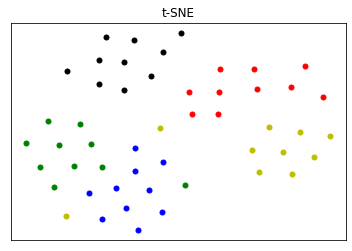

In [35]:
fig1=plot_embedding_2D(result_2D,label,'t-SNE')
fig1.show()

In [33]:
matplotlib.__version__

'3.3.4'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook
# 生成示例点云数据，假设每个点有(x, y, z, value)四个属性
num_points = 100
points = np.loadtxt("cam_mae.txt")  # 随机生成点云数据
x = points[:, 0]
y = points[:, 1]
z = points[:, 2]
value = points[:, 3]

# 创建一个3D图形窗口
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 根据value值生成颜色映射
colors = plt.cm.jet(value)  # 这里使用jet颜色映射，你可以根据需要选择其他颜色映射

# 绘制点云
ax.scatter(x, y, z, c=colors, marker='o')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet)
sm.set_array(value)
cbar = plt.colorbar(sm)

# 设置颜色条标签
cbar.set_label('Value')
ax.axis('off')
# 设置坐标轴标签
#ax.set_xlabel('X')
#ax.set_ylabel('Y')
#ax.set_zlabel('Z')

# 显示图形
plt.show()

<IPython.core.display.Javascript object>